# Projeto final do curso **Regressão Linear: testando relações e prevendo resultados** da Alura

Neste Projeto temos o objetivo de realizar algumas análises em cima do dataset HousePrices_HalfMil em busca de gerar um modelo de regressão linear para estimação do preço dos imóveis.

Dataset: https://www.kaggle.com/datasets/greenwing1985/housepricing

Autor: Pierre Lima

# Importando bibliotecas

In [157]:
import pandas as pd
import numpy as np

In [158]:
dados = pd.read_csv('HousePrices_HalfMil.csv')

In [159]:
dados.head(1)

,Area,Garage,FirePlace,Baths,White Marble,Black Marble,Indian Marble,Floors,City,Solar,Electric,Fiber,Glass Doors,Swiming Pool,Garden,Prices
0,164,2,0,2,0,1,0,0,3,1,1,1,1,0,0,43800


# Conhecendo o dataset

## Variáveis do dataset

In [160]:
dados.columns

Index(['Area', 'Garage', 'FirePlace', 'Baths', 'White Marble', 'Black Marble',
       'Indian Marble', 'Floors', 'City', 'Solar', 'Electric', 'Fiber',
       'Glass Doors', 'Swiming Pool', 'Garden', 'Prices'],
      dtype='object')

In [161]:
# Verificando o tamanho do dataset estudado
dados.shape

print(f'O dataset possui: {dados.shape[0]} linhas e {dados.shape[1]} colunas.')

O dataset possui: 500000 linhas e 16 colunas.


In [162]:
# Exibindo os valores únicos para as variáveis do dataset(exceto Area e Prices)
for i in dados.columns[1:-1]:
    print(f'{i}: {np.sort(dados[i].unique())}')

Garage: [1 2 3]
FirePlace: [0 1 2 3 4]
Baths: [1 2 3 4 5]
White Marble: [0 1]
Black Marble: [0 1]
Indian Marble: [0 1]
Floors: [0 1]
City: [1 2 3]
Solar: [0 1]
Electric: [0 1]
Fiber: [0 1]
Glass Doors: [0 1]
Swiming Pool: [0 1]
Garden: [0 1]


**Area** - Representa a área do imóvel (m²)

**Garage** - Quantidade de vagas para estacionar

**FirePlace** - Quantidade de lareiras

**Baths** - Quantidade de banheiros

**White Marble** - Se possui acabamento em mármore branco (S/N)

**Black Marble** - Se possui acabamento em mármore preto (S/N)

**Indian Marble** - Se possui acabamento em mármore indiano (S/N)

**Floors** - Se o imóvel possui mais de um andar (S/N)

**City** - Cidade onde o imóvel esta localizado

**Solar** - Se o imóvel possui suporte para energia solar (S/N)

**Electric** - Se o imóvel possui suporte para energia elétrica (S/N)

**Fiber** - Se o imóvel possui suporte para internet fibra (S/N)

**Glass Doors** - Se o imóvel possui portas de vidro (S/N)

**Swiming Pool** - Se o imóvel possui piscina (S/N)

**Garden** - Se o imóvel possui jardim (S/N)

## Verificação de valores nulos

Como esperado o dataset não possui valores faltantes. Isto já era previsto, pois o dataset foi gerado por computador para iniciantes aplicarem conceitos de machine learning

In [163]:
dados.isnull().sum()

Area             0
Garage           0
FirePlace        0
Baths            0
White Marble     0
Black Marble     0
Indian Marble    0
Floors           0
City             0
Solar            0
Electric         0
Fiber            0
Glass Doors      0
Swiming Pool     0
Garden           0
Prices           0
dtype: int64

## Visualizando métricas descritivas

Observando os valores das métricas descritivas, inicialmente pode-se dizer que não temos valores discrepantes.

In [164]:
dados.describe().round(4)

,Area,Garage,FirePlace,Baths,White Marble,Black Marble,Indian Marble,Floors,City,Solar,Electric,Fiber,Glass Doors,Swiming Pool,Garden,Prices
count,500000.0000,500000.0000,500000.0000,500000.0000,500000.0000,500000.0000,500000.0000,500000.0000,500000.0000,500000.0000,500000.0000,500000.0000,500000.0000,500000.0000,500000.0000,500000.0000
mean,124.9296,2.0013,2.0034,2.9981,0.3330,0.3327,0.3343,0.4994,2.0009,0.4987,0.5006,0.5005,0.4999,0.5004,0.5016,42050.1394
std,71.7954,0.8170,1.4140,1.4142,0.4713,0.4712,0.4718,0.5000,0.8162,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,12110.2372
min,1.0000,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,7725.0000
25%,63.0000,1.0000,1.0000,2.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,33500.0000
50%,125.0000,2.0000,2.0000,3.0000,0.0000,0.0000,0.0000,0.0000,2.0000,0.0000,1.0000,1.0000,0.0000,1.0000,1.0000,41850.0000
75%,187.0000,3.0000,3.0000,4.0000,1.0000,1.0000,1.0000,1.0000,3.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,50750.0000
max,249.0000,3.0000,4.0000,5.0000,1.0000,1.0000,1.0000,1.0000,3.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,77975.0000


## Vizualizando variável dependente do estudo (Prices)

Utilizando como método de visualização o Box-Plot, conseguimos ver que existem alguns dados que podem ser considerados Outliers. Nesse caso iremos realizar um tratamento, em que utilizando o Interquartil Range(IQR) e os valores do 75º e 25º percentis, são encontrados os limites superior e inferior do Box-Plot para remover os outliers do nosso Dataset.

In [165]:
import seaborn as sns

<AxesSubplot:title={'center':'Variação dos Preços dos Imóveis'}, xlabel='Preços'>

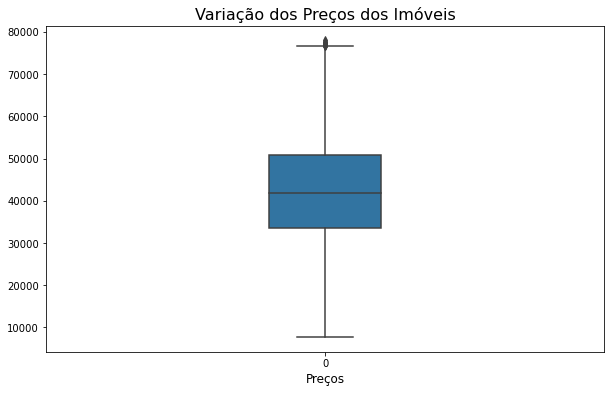

In [166]:
ax = sns.boxplot(data = dados['Prices'], width=0.2)
ax.figure.set_size_inches(10, 6)
ax.set_title('Variação dos Preços dos Imóveis', fontsize= 16)
ax.set_xlabel('Preços', fontsize= 12)
ax

In [167]:
# Obtendo os primeiro e terceiro quartis 
Q3 = dados['Prices'].quantile(0.75)
Q1 = dados['Prices'].quantile(0.25)
print(f' Q1:{Q1} Q3: {Q3}')

 Q1:33500.0 Q3: 50750.0


In [168]:
# Calculando os limites superior e inferior do Boxplot
IQR = Q3 - Q1
superior =  Q3 + 1.5 * IQR
inferior = Q1 - 1.5 * IQR
print(f' O limite inferior é $ {inferior} e o superior $ {superior}')

 O limite inferior é $ 7625.0 e o superior $ 76625.0


In [169]:
dados_sem_outliers = dados.query(f'Prices > {inferior} and Prices < {superior}')

In [170]:
dados_sem_outliers.shape

(499984, 16)

O dataset com Outliers possui **50000 registros** e após a remoção dos Outliers ficou com **499984 registros**.

### Visualizando variável dependente (Prices) sem Outliers

<AxesSubplot:title={'center':'Variação dos Preços dos Imóveis'}, xlabel='Preços'>

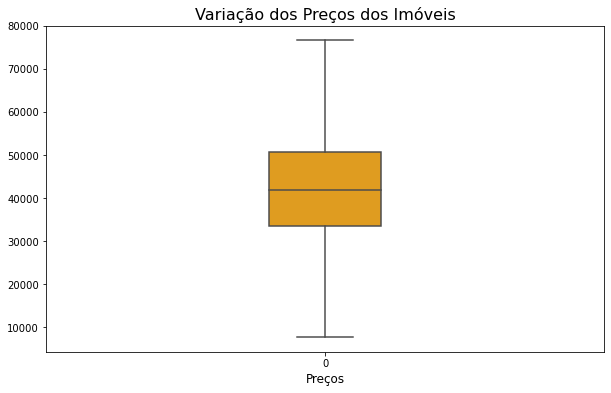

In [171]:
ax = sns.boxplot(data = dados_sem_outliers['Prices'], width=0.2, color= 'orange')
ax.figure.set_size_inches(10, 6)
ax.set_title('Variação dos Preços dos Imóveis', fontsize= 16)
ax.set_xlabel('Preços', fontsize= 12)
ax

* A partir deste momento do notebook, será utilizado o **dataset sem Outliers** para as análises.

## Distribuição de Frequência da variável dependente

Observando a distribuição de frequências, o dataset não aparenta ter uma **assimetria**.

<AxesSubplot:title={'center':'Distribuição de Frequências dos Preços dos Imóveis'}, xlabel='Preços', ylabel='Quantidade'>

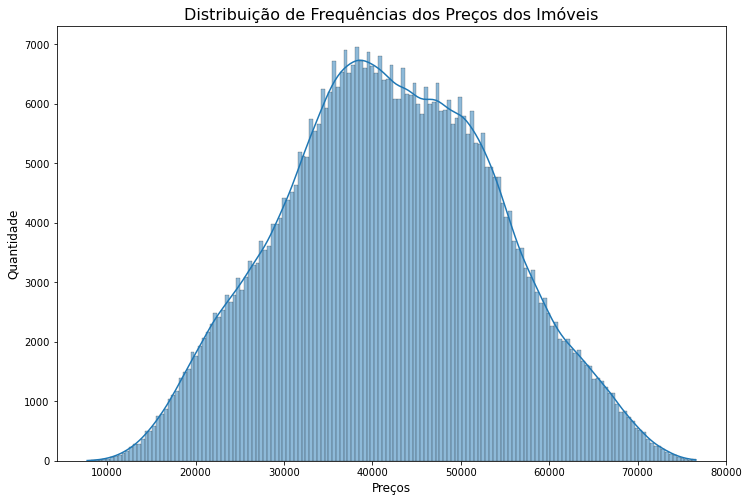

In [172]:
ax = sns.histplot(data = dados_sem_outliers['Prices'], kde=True)
ax.figure.set_size_inches(12, 8)
ax.set_title('Distribuição de Frequências dos Preços dos Imóveis', fontsize= 16)
ax.set_xlabel('Preços', fontsize= 12)
ax.set_ylabel('Quantidade', fontsize= 12)
ax

### Correlação entre as variáveis descritivas e a variável dependente (Prices)

- Através da matrix de correlação, podemos observar que as variáveis que mais influenciam a variavel dependente(Prices) são: 
    * White Marble -> 0.4481
    * Indian Marble -> -0.3697
    * Floors -> 0.6195
    * Fiber -> 0.4846
    
- Também vemos que as variáveis White Marble, Indian Marble e Black Marble possuem uma correlação maior entre elas. Logo tavez seja interessante não utilizar mais de uma dessas variáveis na criação de um modelo. 

In [173]:
dados_sem_outliers.corr().round(4)

,Area,Garage,FirePlace,Baths,White Marble,Black Marble,Indian Marble,Floors,City,Solar,Electric,Fiber,Glass Doors,Swiming Pool,Garden,Prices
Area,1.0000,-0.0010,0.0003,-0.0005,0.0025,-0.0014,-0.0010,-0.0008,-0.0035,0.0005,-0.0002,0.0001,-0.0013,0.0006,0.0014,0.1476
Garage,-0.0010,1.0000,0.0013,-0.0037,0.0005,0.0019,-0.0024,-0.0010,0.0007,0.0015,0.0007,-0.0006,-0.0022,0.0011,-0.0007,0.1002
FirePlace,0.0003,0.0013,1.0000,0.0006,0.0009,-0.0009,-0.0000,0.0001,-0.0003,-0.0003,0.0013,0.0018,-0.0004,0.0013,0.0002,0.0890
Baths,-0.0005,-0.0037,0.0006,1.0000,0.0024,-0.0027,0.0003,-0.0009,-0.0009,-0.0008,0.0010,-0.0007,-0.0017,0.0022,0.0017,0.1450
White Marble,0.0025,0.0005,0.0009,0.0024,1.0000,-0.4989,-0.5007,0.0000,-0.0009,-0.0016,0.0005,-0.0006,-0.0004,-0.0019,0.0010,0.4481
Black Marble,-0.0014,0.0019,-0.0009,-0.0027,-0.4989,1.0000,-0.5004,-0.0003,-0.0003,0.0018,-0.0005,0.0001,0.0001,0.0007,0.0001,-0.0780
Indian Marble,-0.0010,-0.0024,-0.0000,0.0003,-0.5007,-0.5004,1.0000,0.0003,0.0012,-0.0002,0.0000,0.0005,0.0003,0.0012,-0.0011,-0.3697
Floors,-0.0008,-0.0010,0.0001,-0.0009,0.0000,-0.0003,0.0003,1.0000,-0.0007,-0.0027,0.0001,0.0013,-0.0000,-0.0002,-0.0005,0.6195
City,-0.0035,0.0007,-0.0003,-0.0009,-0.0009,-0.0003,0.0012,-0.0007,1.0000,0.0005,0.0008,-0.0028,0.0007,0.0003,0.0012,0.2332
Solar,0.0005,0.0015,-0.0003,-0.0008,-0.0016,0.0018,-0.0002,-0.0027,0.0005,1.0000,0.0019,0.0002,-0.0008,-0.0005,-0.0043,0.0084


In [174]:
# Vizualização somente da correlação entre Preços e as demais variavéis
dados_sem_outliers.corr().round(4)['Prices']

Area             0.1476
Garage           0.1002
FirePlace        0.0890
Baths            0.1450
White Marble     0.4481
Black Marble    -0.0780
Indian Marble   -0.3697
Floors           0.6195
City             0.2332
Solar            0.0084
Electric         0.0524
Fiber            0.4846
Glass Doors      0.1819
Swiming Pool     0.0018
Garden           0.0015
Prices           1.0000
Name: Prices, dtype: float64

### Visualização a disperção das variáveis explicativas em relação a variável dependente(Prices).

- Podemos observar uma pequena tendência positiva nas variáveis: Area, White Marble, Black Marble, Floors, City, Fiber e Glass Door.

- Existe uma pequena tendência de queda para a variável: Indian Marble.

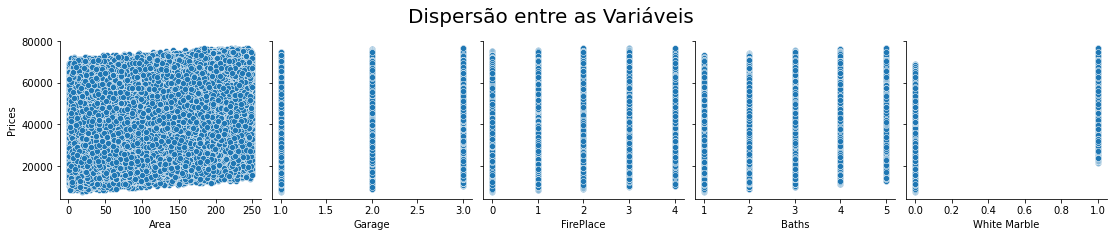

In [175]:
ax = sns.pairplot(x_vars = ['Area', 'Garage', 'FirePlace', 'Baths', 'White Marble'], y_vars = 'Prices',
                  data = dados_sem_outliers)
ax.figure.set_size_inches(16,3)
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.1)
ax

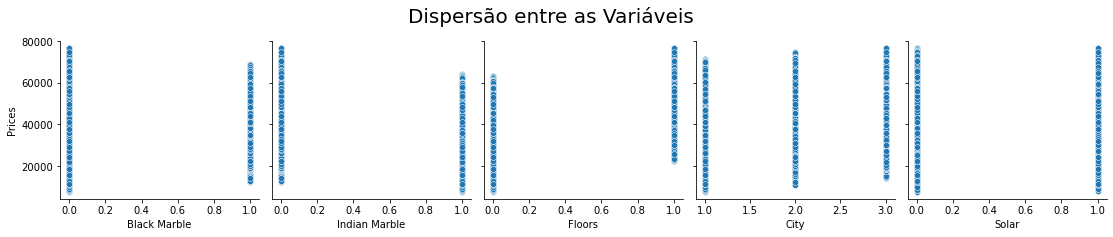

In [176]:
ax = sns.pairplot(x_vars = ['Black Marble', 'Indian Marble', 'Floors', 'City', 'Solar'], y_vars = 'Prices',
                  data = dados_sem_outliers)
ax.figure.set_size_inches(16,3)
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.1)
ax

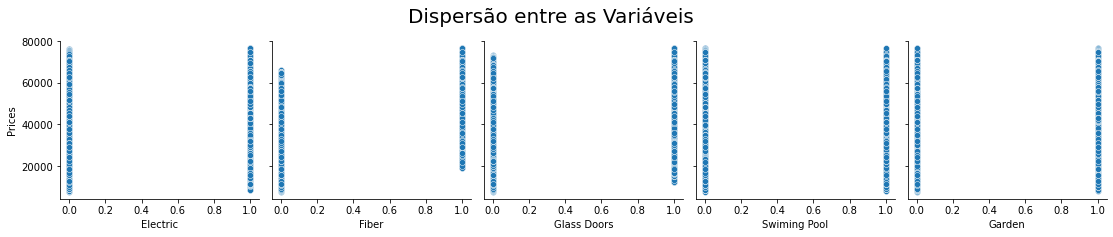

In [177]:
ax = sns.pairplot(x_vars = ['Electric', 'Fiber', 'Glass Doors', 'Swiming Pool', 'Garden'], y_vars = 'Prices',
                  data = dados_sem_outliers)
ax.figure.set_size_inches(16,3)
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.1)
ax

### Vizualizando comportamento das variáveis com maior correlação (matriz de correlação) com a variável Prices


- Utilizando o método de vizualização Box-Plot, é possível observar as tendências que a matriz do correlação mostrou.
    * Tendência positiva: White Marble, Floors e Fiber
    * Tendência negativa: Indian Marble


#### Prices x White Marble (0.4481)

<AxesSubplot:title={'center':'Variação dos Preços dos Imóveis x Acabamento em Mármore branco'}, xlabel='Acabamento em mármore branco', ylabel='Preços'>

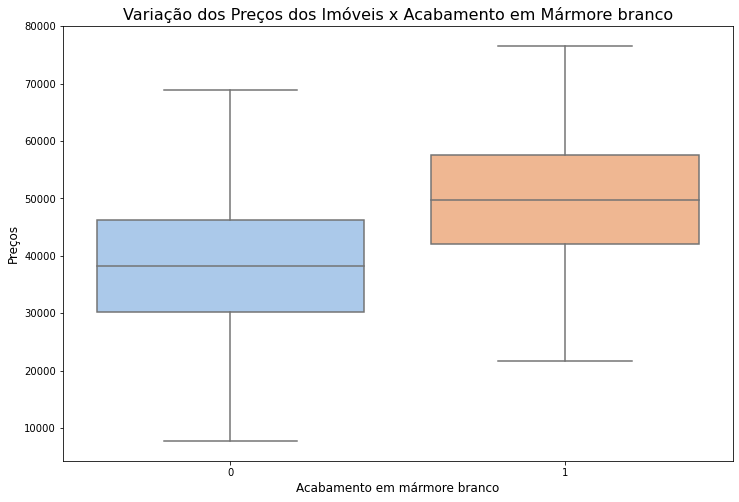

In [178]:
ax = sns.boxplot(x = "White Marble",y = "Prices", data = dados_sem_outliers, palette='pastel')
ax.figure.set_size_inches(12, 8)

ax.set_title('Variação dos Preços dos Imóveis x Acabamento em Mármore branco', fontsize= 16)
ax.set_ylabel('Preços', fontsize= 12)
ax.set_xlabel('Acabamento em mármore branco', fontsize= 12)
ax

#### Prices x Indian Marble(-0.3697)

<AxesSubplot:title={'center':'Variação dos Preços dos Imóveis x Acabamento em Mármore indiano'}, xlabel='Acabamento em mármore indiano', ylabel='Preços'>

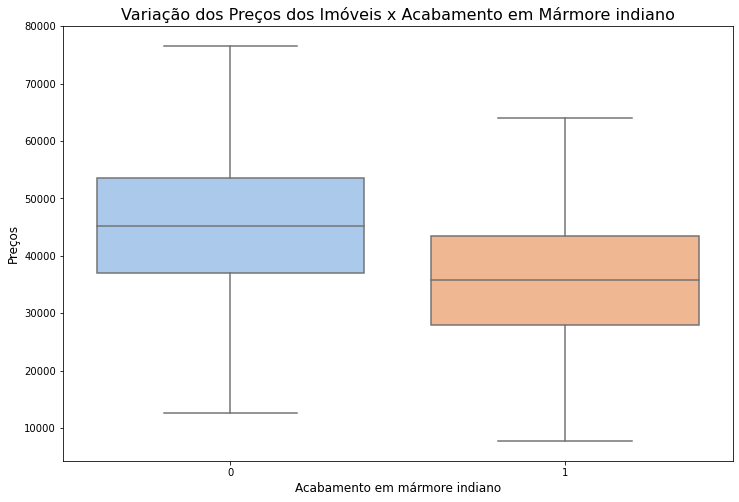

In [179]:
ax = sns.boxplot(x = "Indian Marble",y = "Prices", data = dados_sem_outliers, palette='pastel')
ax.figure.set_size_inches(12, 8)

ax.set_title('Variação dos Preços dos Imóveis x Acabamento em Mármore indiano', fontsize= 16)
ax.set_ylabel('Preços', fontsize= 12)
ax.set_xlabel('Acabamento em mármore indiano', fontsize= 12)
ax

#### Prices x Floors (0.6195)

<AxesSubplot:title={'center':'Variação dos Preços dos Imóveis x Andares'}, xlabel='Andares', ylabel='Preços'>

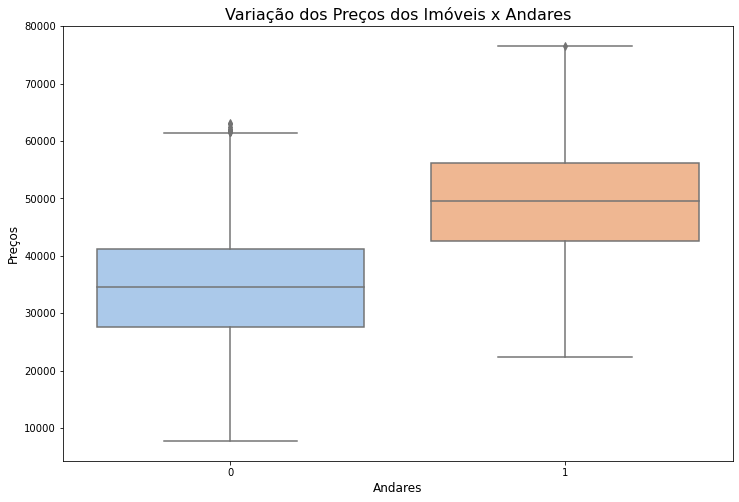

In [180]:
ax = sns.boxplot(y = "Prices", x = 'Floors', data = dados_sem_outliers, palette='pastel')
ax.figure.set_size_inches(12, 8)

ax.set_title('Variação dos Preços dos Imóveis x Andares', fontsize= 16)
ax.set_ylabel('Preços', fontsize= 12)
ax.set_xlabel('Andares', fontsize= 12)


ax


#### Prices x Fiber (0.4846)

<AxesSubplot:title={'center':'Variação dos Preços dos Imóveis x Suporte para Fibra'}, xlabel='Suporte para fibra', ylabel='Preços'>

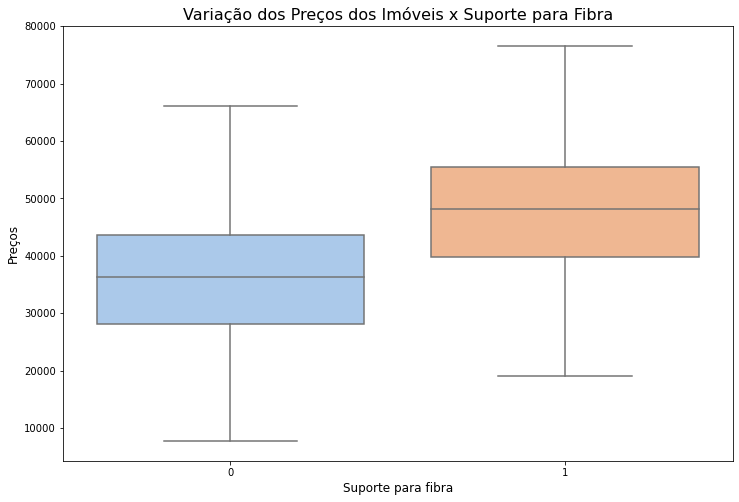

In [181]:
ax = sns.boxplot(x = "Fiber",y = "Prices", data = dados_sem_outliers, palette='pastel')
ax.figure.set_size_inches(12, 8)

ax.set_title('Variação dos Preços dos Imóveis x Suporte para Fibra', fontsize= 16)
ax.set_ylabel('Preços', fontsize= 12)
ax.set_xlabel('Suporte para fibra', fontsize= 12)
ax

# Criação do Modelo

## Importando bibliotecas para auxiliar a criação dos modelos

In [182]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Importando bibliotecas para auxiliar a comparação dos modelos

In [183]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

## Modelo utilizando as variáveis de maior correlação: White Marble, Indian Marble, Floors, Fiber 

- O modelo 1 apresentou R² = 0.847.
- Esse modelo apesar de simples já apresenta um coeficiente de determinação interessante.

### Separando variáveis que serão utilizadas (X eY)

In [184]:
# DataFrame com as variáveis explicativas: 'White Marble', 'Indian Marble', 'Floors', 'Fiber'
X1 = dados_sem_outliers[['White Marble', 'Indian Marble', 'Floors', 'Fiber']]
# Variável dependente: Prices 
Y1 = dados_sem_outliers['Prices']
print(f'{type(X1)} e {type(Y1)}')

<class 'pandas.core.frame.DataFrame'> e <class 'pandas.core.series.Series'>


### Separando dados de treino e teste para o primeiro modelo

- A amostra de teste foi criada com 30% dos dados.
- Foi utilizado random_state = 2512, para facilitar a comparação dos modelos.

In [185]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y1, test_size=0.3, random_state=2512)

In [186]:
# Gerando modelo
modelo1 = LinearRegression()

In [187]:
# Ajustando modelo com os dados de treino
modelo1.fit(X1_train,y1_train)

LinearRegression()

In [188]:
modelo1.score(X1_train,y1_train)
print(f"O modelo apresenta Coeficiente de Determinação(R²): {modelo1.score(X1_train,y1_train).round(3)}")

O modelo apresenta Coeficiente de Determinação(R²): 0.847


### Prevendo o preço do imóvel e calculando R² para o Modelo1

In [189]:
y1_previsto = modelo1.predict(X1_test)

In [190]:
r2_score(y1_test, y1_previsto)
print(f"O modelo apresenta Coeficiente de Determinação(R²): {r2_score(y1_test, y1_previsto).round(3)},\
 para os dados de teste.")

O modelo apresenta Coeficiente de Determinação(R²): 0.847, para os dados de teste.


## Modelo utilizando as variáveis: Area, White Marble, Black Marble, Floors, City, Fiber e Glass Door

- Variáveis que possuem alguma tendência positiva segundo os graficos de disperção.
- O modelo 2 apresenta R² = 0958.
- Ao utilizar as variáveis que possuem tendência positiva (Encontradas nos gráficos de disperção) o modelo apresentou um aumento consideravel no coeficiente de determinação.  

### Separando variáveis que serão utilizadas (X e Y)

In [191]:
# DataFrame com as variáveis explicativas: 'Area', 'White Marble', 'Black Marble', 'Floors', 'City', 'Fiber', 'Glass Doors'
X2 = dados_sem_outliers[['Area', 'White Marble', 'Black Marble', 'Floors', 'City', 'Fiber', 'Glass Doors']]
# Variável dependente: Prices 
Y2 = dados_sem_outliers['Prices']
print(f'{type(X2)} e {type(Y2)}')

<class 'pandas.core.frame.DataFrame'> e <class 'pandas.core.series.Series'>


### Separando dados de treino e teste para o segundo modelo

- A amostra de teste foi criada com 30% dos dados.
- Foi utilizado random_state = 2512, para facilitar a comparação dos modelos.

In [192]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, Y2, test_size=0.3, random_state=2512)

In [193]:
# Gerando modelo
modelo2 = LinearRegression()

In [194]:
# Ajustando modelo com os dados de treino
modelo2.fit(X2_train,y2_train)

LinearRegression()

In [195]:
modelo2.score(X2_train,y2_train)
print(f"O modelo apresenta Coeficiente de Determinação(R²): {modelo2.score(X2_train,y2_train).round(3)}")

O modelo apresenta Coeficiente de Determinação(R²): 0.958


### Prevendo o preço do imóvel e calculando R² para o Modelo2

In [196]:
y2_previsto = modelo2.predict(X2_test)

In [197]:
r2_score(y2_test, y2_previsto)
print(f"O modelo apresenta Coeficiente de Determinação(R²): {r2_score(y2_test, y2_previsto).round(3)},\
 para os dados de teste.")

O modelo apresenta Coeficiente de Determinação(R²): 0.958, para os dados de teste.


## Modelo utilizando todas as variáveis

- Ao utilizar todas as variáveis o modelo 3 atingiu o R² = 1.0

### Separando variáveis que serão utilizadas (X eY)

In [198]:
# DataFrame com todas as variáveis explicativas
X3 = dados_sem_outliers[[  'Area', 'Garage', 'FirePlace', 'Baths', 'White Marble', 'Black Marble',
                           'Indian Marble', 'Floors', 'City', 'Solar', 'Electric', 'Fiber',
                           'Glass Doors', 'Swiming Pool', 'Garden']]
# Variável dependente: Prices 
Y3 = dados_sem_outliers['Prices']
print(f'{type(X3)} e {type(Y3)}')

<class 'pandas.core.frame.DataFrame'> e <class 'pandas.core.series.Series'>


In [199]:
X3.head()

,Area,Garage,FirePlace,Baths,White Marble,Black Marble,Indian Marble,Floors,City,Solar,Electric,Fiber,Glass Doors,Swiming Pool,Garden
0,164,2,0,2,0,1,0,0,3,1,1,1,1,0,0
1,84,2,0,4,0,0,1,1,2,0,0,0,1,1,1
2,190,2,4,4,1,0,0,0,2,0,0,1,0,0,0
3,75,2,4,4,0,0,1,1,1,1,1,1,1,1,1
4,148,1,4,2,1,0,0,1,2,1,0,0,1,1,1


### Separando dados de treino e teste para o terceiro modelo

- A amostra de teste foi criada com 30% dos dados.
- Foi utilizado random_state = 2512, para facilitar a comparação dos modelos.

In [200]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, Y3, test_size=0.3, random_state=2512)

In [201]:
# Gerando modelo
modelo3 = LinearRegression()

In [202]:
# Ajustando modelo com os dados de treino
modelo3.fit(X3_train, y3_train)

LinearRegression()

In [203]:
modelo3.score(X3_train,y3_train)
print(f"O modelo apresenta Coeficiente de Determinação(R²): {modelo3.score(X3_train,y3_train).round(3)}")

O modelo apresenta Coeficiente de Determinação(R²): 1.0


### Prevendo o preço do imóvel e calculando R² para o Modelo2

In [204]:
y3_previsto = modelo3.predict(X3_test)

In [205]:
r2_score(y2_test, y2_previsto)
print(f"O modelo apresenta Coeficiente de Determinação(R²): {r2_score(y3_test, y3_previsto).round(3)},\
 para os dados de teste.")

O modelo apresenta Coeficiente de Determinação(R²): 1.0, para os dados de teste.


# Comparação de modelos

- Utilizando algumas métricas para comparação, pode-se observar que o melhor dos modelos foi o terceiro (Utiliza todas as variáveis).
- No terceiro modelo foi possível obter um R² = 1 e minimizar o EQM para 0.

In [206]:
# Obtendo as métricas para o primeiro modelo
EQM1 = mean_squared_error(y1_test, y1_previsto).round(2)
REQM1 = np.sqrt(mean_squared_error(y1_test, y1_previsto)).round(3)
R2_1 = r2_score(y1_test,y1_previsto).round(3)


print("As métricas de regressão para o modelo 1 \n")
print(f'\t EQM: {EQM1}')
print(f'\t REQM: {REQM1}')
print(f'\t R²: {R2_1}')


As métricas de regressão para o modelo 1 

	 EQM: 22405092.58
	 REQM: 4733.402
	 R²: 0.847


In [207]:
# Obtendo as métricas para o segundo modelo
EQM2 = mean_squared_error(y2_test, y2_previsto).round(2)
REQM2 = np.sqrt(mean_squared_error(y2_test, y2_previsto)).round(3)
R2_2 = r2_score(y2_test,y2_previsto).round(3)


print("As métricas de regressão para o modelo 2 \n")
print(f'\t EQM: {EQM2}')
print(f'\t REQM: {REQM2}')
print(f'\t R²: {R2_2}')

As métricas de regressão para o modelo 2 

	 EQM: 6147096.61
	 REQM: 2479.334
	 R²: 0.958


In [208]:
# Obtendo as métricas para o terceiro modelo
EQM3 = mean_squared_error(y3_test, y3_previsto).round(2)
REQM3 = np.sqrt(mean_squared_error(y3_test, y3_previsto)).round(3)
R2_3 = r2_score(y3_test,y3_previsto).round(3)


print("As métricas de regressão para o modelo 3 \n")
print(f'\t EQM: {EQM3}')
print(f'\t REQM: {REQM3}')
print(f'\t R²: {R2_3}')

As métricas de regressão para o modelo 3 

	 EQM: 0.0
	 REQM: 0.0
	 R²: 1.0


# Criando um simulador para o melhor modelo

In [209]:
dados_sem_outliers.columns

Index(['Area', 'Garage', 'FirePlace', 'Baths', 'White Marble', 'Black Marble',
       'Indian Marble', 'Floors', 'City', 'Solar', 'Electric', 'Fiber',
       'Glass Doors', 'Swiming Pool', 'Garden', 'Prices'],
      dtype='object')

In [210]:
X3_test.head(1)

,Area,Garage,FirePlace,Baths,White Marble,Black Marble,Indian Marble,Floors,City,Solar,Electric,Fiber,Glass Doors,Swiming Pool,Garden
87737,46,1,1,3,0,1,0,1,2,1,1,0,0,0,1


In [211]:
Area = 46
Garage = 1
FirePlace = 1
Baths = 3
WhiteMarble = 0
BlackMarble = 1
IndianMarble = 0
Floors = 1
City = 2
Solar = 1
Electric = 1
Fiber = 0
GlassDoors = 0
SwimingPool = 0
Garden = 1

entrada=[[Area, Garage, FirePlace, Baths, WhiteMarble, BlackMarble, IndianMarble, Floors, City, Solar, Electric,
            Fiber, GlassDoors, SwimingPool, Garden]]

print('$ {0:.2f}'.format(modelo3.predict(entrada)[0]))

$ 36650.00


E:\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [212]:
y3_test.head(1)

87737    36650
Name: Prices, dtype: int64